# Scattering by a small cylinder

In [1]:
from diffractio import np, sp, plt
from diffractio import nm, um, mm, degrees

from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [2]:
def scattering_small_cylinder(
    n_out: float, n_in: float, r_sphere: float, wavelength: float
):
    x0 = np.linspace(-2 * r_sphere, 2 * r_sphere, 1024)
    z0 = np.linspace(0, 4 * r_sphere, 1024)
    u0 = Scalar_source_X(x0, wavelength)
    u0.plane_wave(A=1, theta=0 * degrees)

    u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=n_out)
    u1.incident_field(u0)
    u1.cylinder(
        r0=(0 * um, 1.25 * r_sphere),
        radius=(r_sphere, r_sphere),
        angle=0,
        refractive_index=n_in,
    )

    u1.WPM(has_edges=False, verbose=False)

    u1.draw(kind="intensity", logarithm=True, draw_borders=True, scale="scaled")

    plt.suptitle(
        "$n_{{out}} = {:2.2f}\,\, /\,\, n_{{in}} = {:2.2f}$".format(n_out, n_in),
        fontsize=15,
    )

    return u1

## Scattering by a small, transparent cylinder

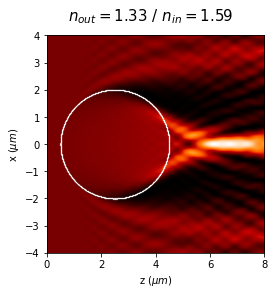

In [3]:
u1 = scattering_small_cylinder(
    n_out=1.33, n_in=1.59, r_sphere=2 * um, wavelength=600 * nm
)

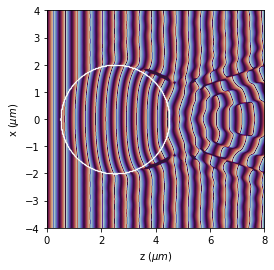

In [4]:
u1.draw(
    kind="phase",
    logarithm=False,
    draw_borders=True,
    scale="scaled",
    percentage_intensity=0.001,
)

## Scattering by a small, absorbent cylinder

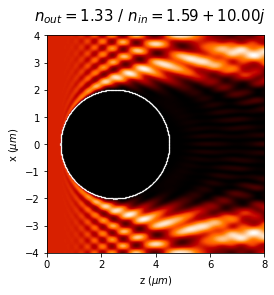

In [5]:
u1 = scattering_small_cylinder(
    n_out=1.33, n_in=1.59 + 10j, r_sphere=2 * um, wavelength=600 * nm
)

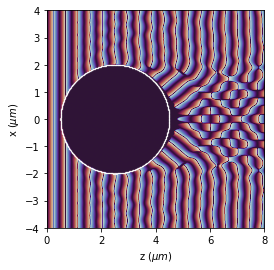

In [6]:
u1.draw(
    kind="phase",
    logarithm=False,
    draw_borders=True,
    scale="scaled",
    percentage_intensity=0.001,
)